In [67]:
import pandas as pd
import pingouin as pg
from pingouin import ancova
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import seaborn as sns
import scipy
import numpy as np
from scipy import stats
import scipy.stats as stats
from bioinfokit.analys import stat
df = pd.read_csv('Diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Cleaning Data

In [68]:
#check dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#check dataset details
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
#check if there is null value in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Catagorize Data

As we can see from the summary above, there are many zeros in the dataset. For some zeroes, they make sense; while the other do not make sense at all. For example, Glucose, BMI and blood pressure cannot be 0, but insulin and pregnancies could be 0. Considering this case, we should replace the zero values of BMI and blood pressure by the medians.

In [69]:
df['Glucose'].replace(0, np.nan, inplace = True)
df['BloodPressure'].replace(0, np.nan, inplace = True)
df['BMI'].replace(0, np.nan, inplace = True)
df.fillna(df.median(),inplace = True)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35        0  33.6   
1              1     85.0           66.0             29        0  26.6   
2              8    183.0           64.0              0        0  23.3   
3              1     89.0           66.0             23       94  28.1   
4              0    137.0           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48      180  32.9   
764            2    122.0           70.0             27        0  36.8   
765            5    121.0           72.0             23      112  26.2   
766            1    126.0           60.0              0        0  30.1   
767            1     93.0           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [70]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [71]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In this step, we will wrangle continuous variables to catagorical variables.

In [72]:
maxBMI = df['BMI'].max()
print(maxBMI)
maxGlucose = df['Glucose'].max()
print(maxGlucose)

67.1
199.0


In [73]:
#source: https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html
df["BMIGroup"]=pd.cut(df["BMI"],bins=[0,18.5,25,30,68],labels=["Underweight","NormalWeight", "Overweight","Obese"])

#source: 

df["GlucoseLevel"]=pd.cut(df["Glucose"],bins=[0,100,125,200],labels=["Normal","Prediabetes", "Diabetes"])
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0             35        0  33.6   
1             1     85.0           66.0             29        0  26.6   
2             8    183.0           64.0              0        0  23.3   
3             1     89.0           66.0             23       94  28.1   
4             0    137.0           40.0             35      168  43.1   
5             5    116.0           74.0              0        0  25.6   
6             3     78.0           50.0             32       88  31.0   
7            10    115.0           72.0              0        0  35.3   
8             2    197.0           70.0             45      543  30.5   
9             8    125.0           96.0              0        0  32.3   
10            4    110.0           92.0              0        0  37.6   
11           10    168.0           74.0              0        0  38.0   
12           10    139.0           80.0              0        0  27.1   
13            1    189.0           60.0             23      846  30.1   
14            5    166.0           72.0             19      175  25.8   
15            7    100.0           72.0              0        0  30.0   
16            0    118.0           84.0             47      230  45.8   
17            7    107.0           74.0              0        0  29.6   
18            1    103.0           30.0             38       83  43.3   
19            1    115.0           70.0             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome      BMIGroup GlucoseLevel  
0                      0.627   50        1         Obese     Diabetes  
1                      0.351   31        0    Overweight       Normal  
2                      0.672   32        1  NormalWeight     Diabetes  
3                      0.167   21        0    Overweight       Normal  
4                      2.288   33        1         Obese     Diabetes  
5                      0.201   30        0    Overweight  Prediabetes  
6                      0.248   26        1         Obese       Normal  
7                      0.134   29        0         Obese  Prediabetes  
8                      0.158   53        1         Obese     Diabetes  
9                      0.232   54        1         Obese  Prediabetes  
10                     0.191   30        0         Obese  Prediabetes  
11                     0.537   34        1         Obese     Diabetes  
12                     1.441   57        0    Overweight     Diabetes  
13                     0.398   59        1         Obese     Diabetes  
14                     0.587   51        1    Overweight     Diabetes  
15                     0.484   32        1    Overweight       Normal  
16                     0.551   31        1         Obese  Prediabetes  
17                     0.254   31        1    Overweight  Prediabetes  
18                     0.183   33        0         Obese  Prediabetes  
19                     0.529   32        1         Obese  Prediabetes

## Exploratory Data Analysis & t-test

Glucose:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


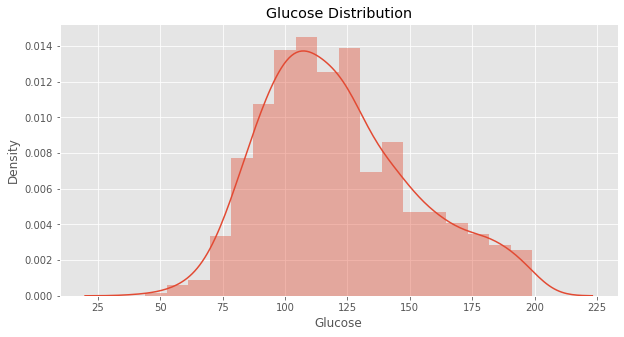

<AxesSubplot:xlabel='Glucose'>

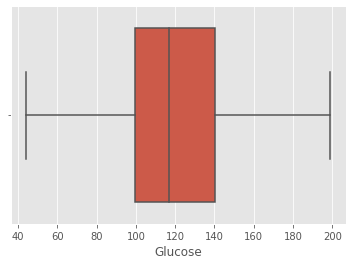

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Glucose Distribution') 
sns.distplot(df['Glucose'])
plt.show()
sns.boxplot(x=df['Glucose'])


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

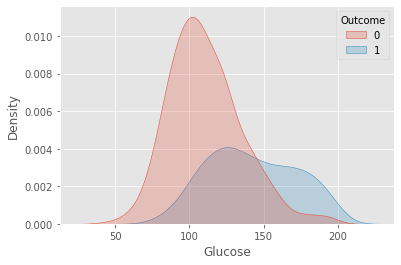

In [12]:
sns.kdeplot(data=df, x="Glucose", hue="Outcome", fill=True)

<font color='red'>T-test & One-way ANOVA for Glucose and Outcome:</font>

In [13]:
tStat, pValue = stats.ttest_ind(df[df["Outcome"]==0]["Glucose"],df[df["Outcome"]==1]['Glucose'])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:3.1287190418423694e-48 T-Statistic:-15.673795182294105


In [14]:
aov = pg.anova(data=df, dv="Glucose",between="Outcome",detailed=True)
print(aov)

    Source             SS   DF             MS           F         p-unc  \
0  Outcome  172562.382896    1  172562.382896  245.667855  3.128719e-48   
1   Within  538054.867104  766     702.421498         NaN           NaN   

        np2  
0  0.242834  
1       NaN  


The P-value is smaller than 0.05, there is a significant difference of glucose exist between diabetes and non-diabetes.

BloodPressure:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


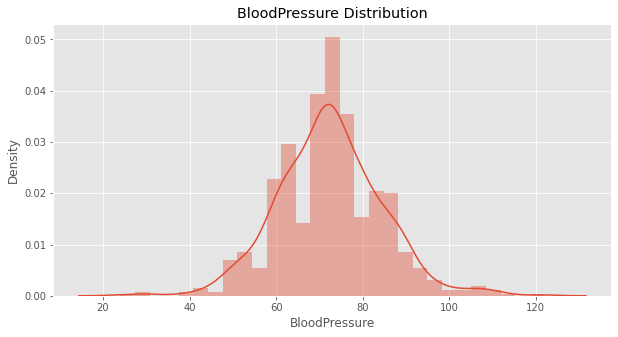

<AxesSubplot:xlabel='BloodPressure'>

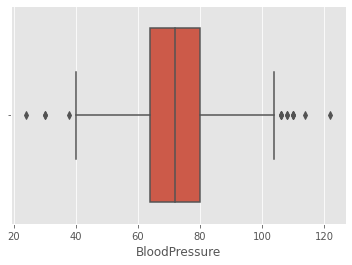

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BloodPressure Distribution') 
sns.distplot(df['BloodPressure'])
plt.show()
sns.boxplot(x=df['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

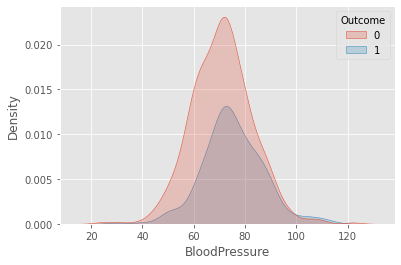

In [16]:
sns.kdeplot(data=df, x="BloodPressure", hue="Outcome", fill=True)

<font color='red'>T-test & One-way ANOVA for BloodPressure and Outcome:</font>

In [17]:
tStat, pValue = stats.ttest_ind(df[df["Outcome"]==0]["BloodPressure"],df[df["Outcome"]==1]['BloodPressure'])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
aov = pg.anova(data=df, dv="BloodPressure",between="Outcome",detailed=True)
print(aov)

P-Value:3.8908354906479115e-06 T-Statistic:-4.65097622072597
    Source             SS   DF           MS         F     p-unc       np2
0  Outcome    3082.407964    1  3082.407964  21.63158  0.000004  0.027464
1   Within  109151.736567  766   142.495740       NaN       NaN       NaN


The P-value is smaller than 0.05, there is a significant difference of BloodPressure exist between diabetes and non-diabetes.

BMI:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


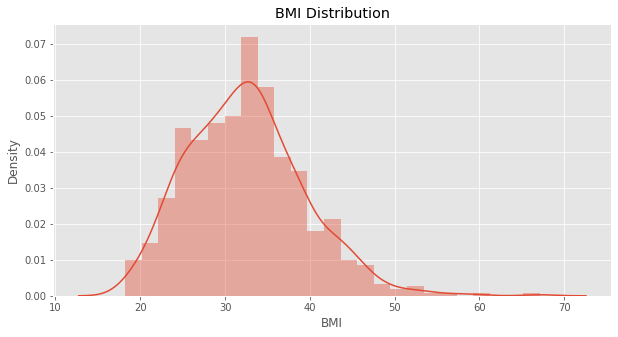

<AxesSubplot:xlabel='BMI'>

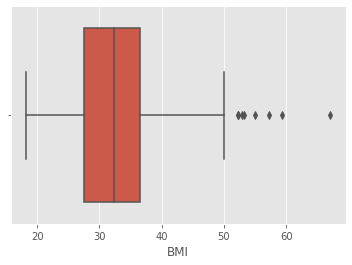

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution') 
sns.distplot(df['BMI'])
plt.show()
sns.boxplot(x=df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

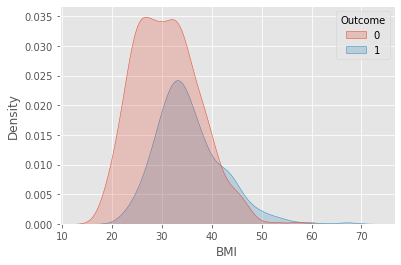

In [19]:
sns.kdeplot(data=df, x="BMI", hue="Outcome", fill=True)

<font color='red'>T-test & One-way ANOVA for BloodPressure and Outcome:</font>

In [20]:
tStat, pValue = stats.ttest_ind(df[df["Outcome"]==0]["BMI"],df[df["Outcome"]==1]['BMI'])
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
aov = pg.anova(data=df, dv="BMI",between="Outcome",detailed=True)
print(aov)

P-Value:8.336902677509037e-19 T-Statistic:-9.090064413986648
    Source            SS   DF           MS          F         p-unc       np2
0  Outcome   3530.035085    1  3530.035085  82.629271  8.336903e-19  0.097368
1   Within  32724.564081  766    42.721363        NaN           NaN       NaN


The P-value is smaller than 0.05, there is a significant difference of BMI exist between diabetes and non-diabetes.

In [21]:
pt = pg.pairwise_tukey(dv='BloodPressure',between='BMIGroup',effsize='cohen',data=df)
print(pt)

              A             B    mean(A)    mean(B)      diff        se  \
0   Underweight  NormalWeight  69.500000  68.111111  1.388889  6.031065   
1   Underweight    Overweight  69.500000  69.811111 -0.311111  5.987831   
2   Underweight         Obese  69.500000  74.355042 -4.855042  5.947221   
3  NormalWeight    Overweight  68.111111  69.811111 -1.700000  1.441700   
4  NormalWeight         Obese  68.111111  74.355042 -6.243931  1.262461   
5    Overweight         Obese  69.811111  74.355042 -4.543931  1.036428   

          T   p-tukey     cohen  
0  0.230289  0.995696  0.117257  
1 -0.051957  0.999950 -0.026266  
2 -0.816355  0.846757 -0.409889  
3 -1.179163  0.640222 -0.143523  
4 -4.945841  0.000006 -0.527146  
5 -4.384223  0.000078 -0.383623  


In [22]:
pt = pg.pairwise_tukey(dv='BloodPressure',between='GlucoseLevel',effsize='cohen',data=df)
print(pt)

             A            B    mean(A)    mean(B)      diff        se  \
0       Normal  Prediabetes  68.861244  71.187023 -2.325779  1.089338   
1       Normal     Diabetes  68.861244  75.925926 -7.064682  1.060474   
2  Prediabetes     Diabetes  71.187023  75.925926 -4.738903  0.995527   

          T       p-tukey     cohen  
0 -2.135038  8.354394e-02 -0.198012  
1 -6.661815  1.553527e-10 -0.601473  
2 -4.760194  6.903365e-06 -0.403461  


## 2-way ANOVA, Interaction Plot, Post Hoc test:

In [23]:
model = ols('BloodPressure ~  C(BMIGroup)+C(GlucoseLevel) + C(BMIGroup):C(GlucoseLevel)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

sum_sq     df           F        PR(>F)
Intercept                     13601.333333    1.0  101.027772  2.138571e-22
C(BMIGroup)                    1142.813166    3.0    2.829523  3.762454e-02
C(GlucoseLevel)                3018.364305    2.0   11.209880  1.593350e-05
C(BMIGroup):C(GlucoseLevel)    4890.016348    6.0    6.053665  3.339960e-06
Residual                     101914.643546  757.0         NaN           NaN

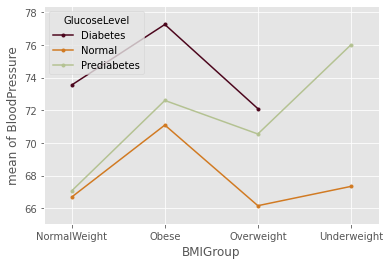

In [24]:
#interaction plot
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(x=df['BMIGroup'].astype("str"), trace=df['GlucoseLevel'].astype("str"), response=df['BloodPressure'],
                colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

<font color='red'>Post hoc test for main effect BMI Group:</font>

In [25]:
res = stat()
res.tukey_hsd(df=df, res_var='BloodPressure', xfac_var='BMIGroup', anova_model='BloodPressure~C(BMIGroup)+C(GlucoseLevel)+C(BMIGroup):C(GlucoseLevel)')
res.tukey_summary

/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1        group2      Diff      Lower      Upper   q-value  \
0         Obese    Overweight  4.543931   1.929827   7.158035  6.329424   
1         Obese  NormalWeight  6.243931   3.059720   9.428141  7.140221   
2         Obese   Underweight  4.855042 -10.145186  19.855270  1.178557   
3    Overweight  NormalWeight  1.700000  -1.936293   5.336293  1.702337   
4    Overweight   Underweight  0.311111 -14.791546  15.413769  0.075010   
5  NormalWeight   Underweight  1.388889 -13.822815  16.600592  0.332464   

    p-value  
0  0.001000  
1  0.001000  
2  0.817497  
3  0.609746  
4  0.900000  
5  0.900000

<font color='red'>Post hoc test for main effect Glucose level:</font>

In [26]:
res = stat()
res.tukey_hsd(df=df, res_var='BloodPressure', xfac_var='GlucoseLevel', anova_model='BloodPressure~C(BMIGroup)+C(GlucoseLevel)+C(BMIGroup):C(GlucoseLevel)')
res.tukey_summary

/opt/anaconda3/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1       group2      Diff     Lower     Upper   q-value   p-value
0  Diabetes       Normal  7.064682  4.604520  9.524844  9.537035  0.001000
1  Diabetes  Prediabetes  4.738903  2.429409  7.048397  6.814679  0.001000
2    Normal  Prediabetes  2.325779 -0.201345  4.852903  3.056514  0.078719

## Linear Regression


In [27]:
numerical_features = df.select_dtypes(exclude=["object", "category"]).columns
X = df[numerical_features].drop(["BloodPressure", "Outcome"], axis = 1)
y = df["BloodPressure"]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     27.58
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           7.11e-34
Time:                        03:53:02   Log-Likelihood:                -2916.9
No. Observations:                 768   AIC:                             5850.
Df Residuals:                     760   BIC:                             5887.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       43.0331      2.396     17.962      0.000      38.330      47.736
Pregnancies                  0.1198      0.139      0.861      0.389      -0.153       0.393
Glucose                      0.0492      0.015      3.354      0.001       0.020       0.078
SkinThickness               -0.0150      0.030     -0.506      0.613      -0.073       0.043
Insulin                     -0.0113      0.004     -2.796      0.005      -0.019      -0.003
BMI                          0.4924      0.063      7.757      0.000       0.368       0.617
DiabetesPedigreeFunction    -1.6929      1.222     -1.385      0.166      -4.092       0.707
Age                          0.2687      0.041      6.518      0.000       0.188       0.350
==============================================================================
Omnibus:                       39.071   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.093
Skew:                           0.092   Prob(JB):                     1.87e-27
Kurtosis:                       4.953   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X

const  Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0      1.0            6    148.0             35        0  33.6   
1      1.0            1     85.0             29        0  26.6   
2      1.0            8    183.0              0        0  23.3   
3      1.0            1     89.0             23       94  28.1   
4      1.0            0    137.0             35      168  43.1   
..     ...          ...      ...            ...      ...   ...   
763    1.0           10    101.0             48      180  32.9   
764    1.0            2    122.0             27        0  36.8   
765    1.0            5    121.0             23      112  26.2   
766    1.0            1    126.0              0        0  30.1   
767    1.0            1     93.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
print(regressor.intercept_)

43.64409209579977


In [32]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
const                        0.000000
Pregnancies                  0.071466
Glucose                      0.048082
SkinThickness               -0.011421
Insulin                     -0.012511
BMI                          0.494174
DiabetesPedigreeFunction    -1.784455
Age                          0.262792

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
661    76.0  77.286763
122    74.0  69.265604
113    62.0  70.258200
14     72.0  74.681218
529    65.0  68.106715
..      ...        ...
476    80.0  68.937943
482    58.0  67.702800
230    86.0  77.131736
527    74.0  67.063880
380    72.0  67.554328

[154 rows x 2 columns]

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.388460539763589
Mean Squared Error: 124.69906413589945
Root Mean Squared Error: 11.16687351660703


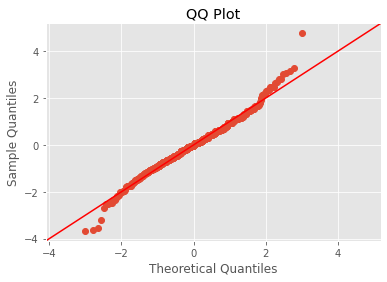

In [36]:
sm.qqplot(res.anova_std_residuals,line="45")
plt.title("QQ Plot")
plt.show()

## ANCOVA:

In [58]:
#ANCOVA Test 1
ancova(data = df, dv = 'BloodPressure', covar='BMI', between='GlucoseLevel')


Source             SS   DF          F         p-unc       np2
0  GlucoseLevel    3451.226483    2   5.023847  6.799650e-03  0.013065
1           BMI   17946.365625    1  52.247969  1.194659e-12  0.064404
2      Residual  260704.709851  759        NaN           NaN       NaN

In [54]:
#ANCOVA Test 2
ancova(data = df, dv = 'BloodPressure', covar='Glucose', between='BMIGroup')


Source             SS   DF         F     p-unc       np2
0  BMIGroup    6683.886994    3  6.938960  0.000131  0.026936
1   Glucose    2469.032340    1  7.689769  0.005691  0.010122
2  Residual  241452.276621  752       NaN       NaN       NaN

## Power Analysis:

In [60]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

In [80]:
# Power Analysis test 1
# set parameters
effect_size = 0.8
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


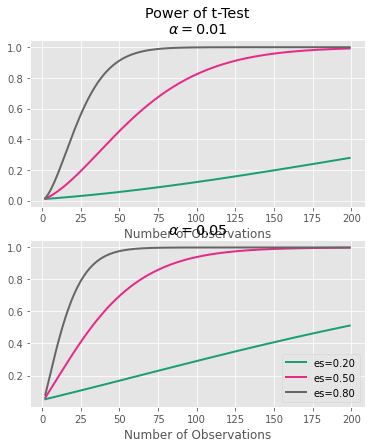

In [81]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

In [82]:
# Power Analysis test 2: use a different effect size
# set parameters
effect_size = 0.9
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 20.39


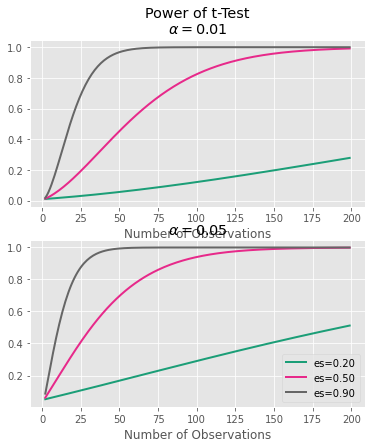

In [85]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.9]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.9]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)